# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv')

df


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    str    
 1   sales   366 non-null    float64
dtypes: float64(1), str(1)
memory usage: 5.8 KB


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[us]
 1   sales   366 non-null    float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 5.8 KB


In [8]:
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [10]:
df.index = df.date
df.drop('date',axis=1,inplace=True)
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


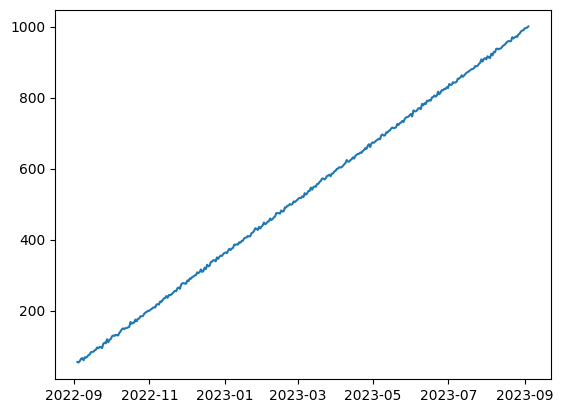

In [12]:
import matplotlib.pyplot as plt

plt.plot(df)
plt.show()

In [14]:
df_train = df[df.index<='2023-08-01']
df_test = df[df.index>'2023-08-01']

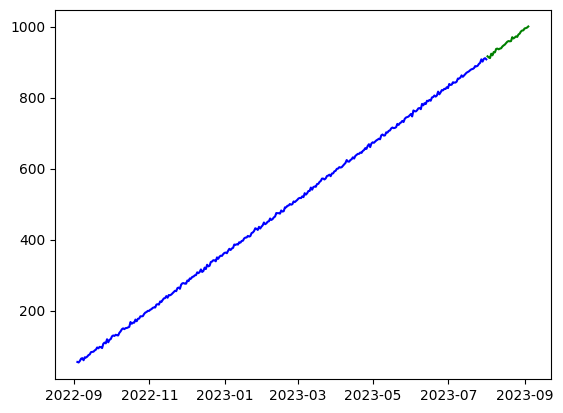

In [15]:
plt.plot(df_train,color='blue')
plt.plot(df_test,color='green')
plt.show()

In [17]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 41.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 32.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


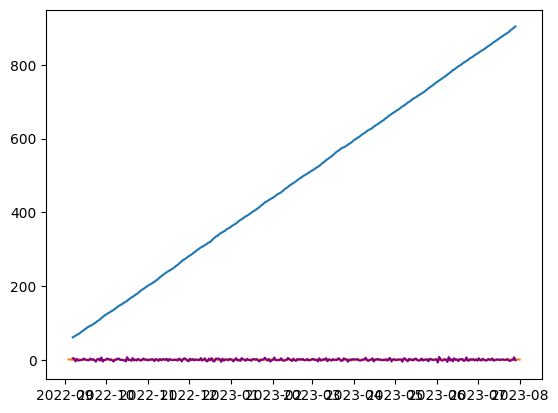

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal = seasonal_decompose(df_train,period=7)

trend = seasonal.trend
estacionalidad = seasonal.seasonal
error = seasonal.resid

plt.plot(trend)
plt.plot(estacionalidad)
plt.plot(error,color='purple')




In [22]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.0/698.0 kB 16.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 52.5 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [28]:
from pmdarima import auto_arima

model = auto_arima(df_train,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1673.403, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1904.573, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1792.947, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1670.865, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2005.236, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1670.214, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1672.117, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1674.856, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1670.139, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1672.113, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1966.589, Time=0.04 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.083 seconds


In [37]:
sales_pred = model.predict(34)
sales_pred

2023-08-01 17:10:08.079328    914.086751
2023-08-02 17:10:08.079328    916.379149
2023-08-03 17:10:08.079328    918.975976
2023-08-04 17:10:08.079328    921.572804
2023-08-05 17:10:08.079328    924.169632
2023-08-06 17:10:08.079328    926.766459
2023-08-07 17:10:08.079328    929.363287
2023-08-08 17:10:08.079328    931.960115
2023-08-09 17:10:08.079328    934.556943
2023-08-10 17:10:08.079328    937.153770
2023-08-11 17:10:08.079328    939.750598
2023-08-12 17:10:08.079328    942.347426
2023-08-13 17:10:08.079328    944.944253
2023-08-14 17:10:08.079328    947.541081
2023-08-15 17:10:08.079328    950.137909
2023-08-16 17:10:08.079328    952.734736
2023-08-17 17:10:08.079328    955.331564
2023-08-18 17:10:08.079328    957.928392
2023-08-19 17:10:08.079328    960.525220
2023-08-20 17:10:08.079328    963.122047
2023-08-21 17:10:08.079328    965.718875
2023-08-22 17:10:08.079328    968.315703
2023-08-23 17:10:08.079328    970.912530
2023-08-24 17:10:08.079328    973.509358
2023-08-25 17:10

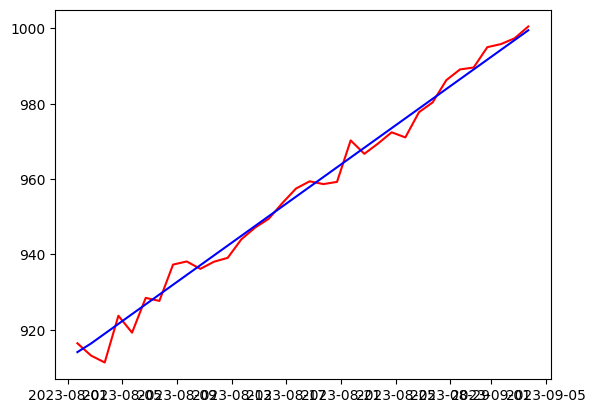

In [38]:
plt.plot(df_test,color='red')
plt.plot(sales_pred,color='blue')
plt.show()

In [40]:
from sklearn.metrics import root_mean_squared_error, r2_score

error_2 = root_mean_squared_error(df_test,sales_pred)
r2 = r2_score(df_test,sales_pred)

print(f'El error cuadratico medio en raiz es de {error_2} y el R2 es de {r2}')


El error cuadratico medio en raiz es de 2.8347645458529587 y el R2 es de 0.9882747345147518


In [42]:
from pickle import dump

dump(model,open('../models/arima_0_1_2.pkl','wb'))